In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Thư viện

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Tải và đọc dữ liệu

In [ ]:
!gdown 1WkVx5tinsxuU3SnIwLNiYU7X2Sqo3vgG

Downloading...
From: https://drive.google.com/uc?id=1WkVx5tinsxuU3SnIwLNiYU7X2Sqo3vgG
To: /content/employee_data.csv
100% 14.2k/14.2k [00:00<00:00, 28.5MB/s]


In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Exam Module 3/Datasets/RForest, Ada XGBoost /employee_data.csv')
data = pd.read_csv('/content/employee_data.csv')
data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [ ]:
data.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


# Tiền xử lý

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Position'] = label_encoder.fit_transform(data['Position'])

In [ ]:
X = data[['Gender', 'Experience (Years)', 'Position']]
y = data['Salary']

In [ ]:
X.head()

,Gender,Experience (Years),Position
0,0,4,2
1,1,6,2
2,1,17,10
3,1,7,8
4,0,13,8


In [ ]:
y.head()

,Salary
0,109976
1,120088
2,181301
3,77530
4,152397


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình AdaBoost

In [ ]:
ada_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

### Check important feature

In [ ]:
importances = ada_regressor.feature_importances_

In [ ]:
feature_names = ['Gender', 'Experience (Years)', 'Position']
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
1  Experience (Years)    0.500432
2            Position    0.492506
0              Gender    0.007063


In [ ]:
y_pred_ada = ada_regressor.predict(X_test)

In [ ]:
print("AdaBoost Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ada)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_ada)}")

AdaBoost Regressor Performance:
Mean Squared Error: 706602034.7067907
R^2 Score: 0.6217405257704599


In [ ]:
y_test

,Salary
209,93165
280,91842
33,97240
210,68000
93,128620
...,...
246,177180
227,186294
369,159733
176,77683


In [ ]:
y_pred_ada

array([144197.15625   , 100972.70967742, 109356.17241379, 101524.26415094,
       172625.40178571, 102336.55882353, 149336.07407407, 138709.35135135,
       139364.15      , 102422.44117647, 142660.69444444, 192782.84848485,
       152384.31818182, 187788.61038961,  96611.16216216, 164484.27027027,
        89727.02439024, 111467.90909091, 192543.74675325, 100972.70967742,
       131130.32      , 146904.85714286, 129761.        ,  86233.66666667,
       139364.15      , 154152.69565217, 102336.55882353, 114353.90697674,
       187788.61038961, 137673.90140845, 183745.03703704, 111088.2       ,
       149738.54054054, 172625.40178571, 161836.6       , 179904.12299465,
       170203.06666667, 149336.07407407, 177332.72881356, 130353.79661017,
       114873.78947368, 149336.07407407, 137673.90140845, 152384.31818182,
       159978.6       , 114353.90697674, 154152.69565217, 117897.18518519,
        89727.02439024, 127021.84615385,  89727.02439024, 161836.6       ,
       102336.55882353, 1

### Huấn luyện mô hình GradientBoost

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

### Important Features

In [ ]:
importances = gb_regressor.feature_importances_

In [ ]:
feature_names = ['Gender', 'Experience (Years)', 'Position']
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
1  Experience (Years)    0.527053
2            Position    0.463213
0              Gender    0.009734


# a


In [ ]:
y_pred_gb = gb_regressor.predict(X_test)

In [ ]:
print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_gb)}")

Gradient Boosting Regressor Performance:
Mean Squared Error: 669389596.7639914
R^2 Score: 0.6416611550917208


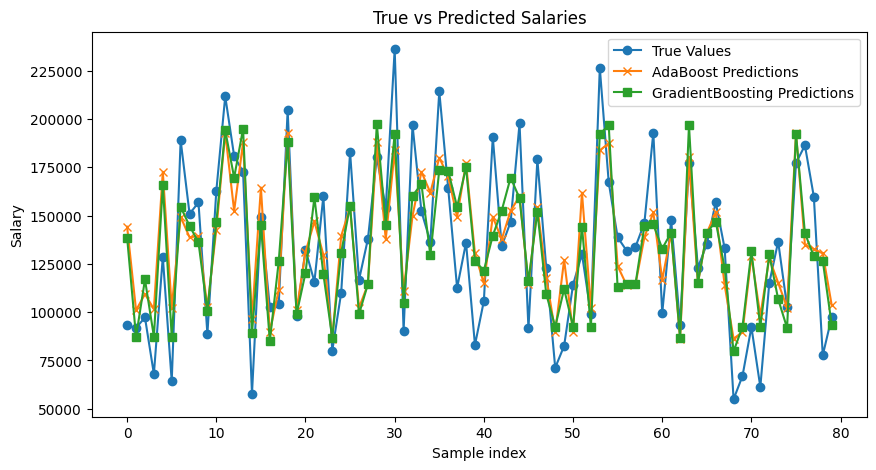

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(np.arange(len(y_test)), y_pred_ada, label='AdaBoost Predictions', marker='x')
plt.plot(np.arange(len(y_test)), y_pred_gb, label='GradientBoosting Predictions', marker='s')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Salary')
plt.title('True vs Predicted Salaries')
plt.show()

In [ ]:
# Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Chuyển dữ liệu về dạng DMatrix (được tối ưu cho XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Định nghĩa các tham số cho mô hình XGBoost
params = {
    'objective': 'reg:squarederror',  # Loại bài toán là hồi quy (regression)
}

In [ ]:
# Huấn luyện mô hình
num_round = 50  # Số lượng vòng lặp boosting (số cây quyết định sẽ được huấn luyện)
origin_model = xgb.train(params, dtrain, num_round)  # Huấn luyện mô hình XGBoost với các tham số đã định nghĩa

# Compare 4 models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# Evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {'R^2': r2, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        R^2           MSE
Random Forest      0.557242  8.270873e+08
XGBoost            0.366861  1.182725e+09
AdaBoost           0.621741  7.066020e+08
Gradient Boosting  0.641661  6.693896e+08
